<img src="https://i.ibb.co/hcrKx44/Weekly-Challenge-Banner.png">

# Weekly Challenge 3
##  Description
Welcome to the 2nd challenge! This semester, 6 challenges will be proposed, with increasing difficulty:
* 2 "easy" challenges (challenges 1-2)
* 2 "medium" challenges (challenges 3-4)
* 2 "hard" challenges (challenges 5-6)


## The task

### Background 1
You have decided to attend the [Applied Machine Learning Days](https://appliedmldays.org/) at the SwissTech Convention center to learn about the latest research in AI and boost your networking skills.

To save money on the entry ticket and because you love machine learning, you finally decide to participate as a staff member. In exchange, the organizer asks you to help them with a curious problem involving _carpets_.


### Background 2
There are $n$ key areas in the venue, and the different key areas are connected to each other by $M$ **undirected** carpets. Each carpet can be represented by three integers $u$, $v$, $w$, where $u$ and $v$ are the numbers of the two key areas connected by the carpet and $w$ is the beauty of this carpet.

Once the conference is over, the carpets will have to be removed. 

In order to implement the principle of frugality, the organizers were asked to keep only $K$ carpets, and only one way to reach each other between any two mutually accessible points in the diagram formed by the kept carpets. 

In other words, the organizer requires that there be no cycles in the new diagram. Now the organizer asks you to help him figure out what is the maximum sum of the beauty of these $K$ carpets.

**Challenge:** You are given the following parameters:
* Two integers: $n\_areas$ the number of areas and $n\_carpets$ the number of carpets the organizers decided to keep
* One list $carpet\_list$ whose length is $M$, where each element is a tuple of length 3, representing $u$, $v$, $w$ respectively.

Write a function that given $n\_areas$, $n\_carpets$ and $carpet\_list$, returns the maximum sum of the beauty of these carpets.

Note: Carpet numbering starts from 0.

### Example (for $n\_carpets = K = 3$ and $n\_areas = 4$)

<img src="diagram.PNG">

## Solution
* The solution is based on the concept of [minimum spanning trees](https://en.wikipedia.org/wiki/Minimum_spanning_tree), which denote subgraphs with the minimum sum of edge weights within larger graphs.
    * You can thus view areas as edges, carpets as vertices, and carpet beauty as edge weights.
* As we want to maximize carpet beauty, this problem is equivalent to a _maximum_ spanning tree problem.
    * Once again, you could use [networkx](https://networkx.org/) to do the heavy lifting for you
* Note that the solution (13, 21, 34) are members of the famous Fibonacci sequence :)

In [1]:
import json
import random

from collections import namedtuple

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
#################################################
############# YOUR CODE STARTS HERE #############
#################################################

def carpet_optimizer(n_areas, n_carpets, carpet_list):
    ans = 0
    carpet_list.sort(key=lambda x: x[2], reverse=True)
    father = [i for i in range(n_areas)]
    def ancestor(x):
        if father[x] != x:
            father[x] = ancestor(father[x])
        return father[x]
    for u, v, w in carpet_list:
        if ancestor(u) != ancestor(v):
            n_carpets -= 1
            ans += w
            father[ancestor(u)] = v
        if n_carpets == 0:
            break
    return ans

#################################################
############## YOUR CODE ENDS HERE ##############
#################################################

In [3]:
# Load the inputs
with open('res.json') as f:
    res = json.load(f)

In [4]:
# Show the results
for r in res:
    for key, val in r.items():
        print(f'{key}: {val}')
    print(carpet_optimizer(r['n_areas'], r['n_carpets'], r['carpet_list']), end='\n\n')

n_areas: 6
n_carpets: 6
carpet_list: [[0, 1, 5], [0, 2, 5], [2, 4, 5], [0, 3, 4], [0, 4, 2], [0, 5, 2], [1, 3, 2], [1, 4, 2], [1, 5, 2], [2, 3, 2], [3, 4, 2], [3, 5, 2], [1, 2, 1], [2, 5, 1], [4, 5, 1]]
ans: 21
21

n_areas: 4
n_carpets: 3
carpet_list: [[1, 3, 5], [0, 1, 4], [0, 2, 4], [1, 2, 2], [2, 3, 2], [0, 3, 1]]
ans: 13
13

n_areas: 9
n_carpets: 7
carpet_list: [[1, 5, 5], [1, 7, 5], [2, 4, 5], [2, 6, 5], [3, 4, 5], [4, 5, 5], [0, 3, 4], [0, 5, 4], [1, 3, 4], [1, 4, 4], [2, 7, 4], [3, 8, 4], [4, 8, 4], [5, 6, 4], [0, 7, 3], [1, 2, 3], [3, 5, 3], [4, 7, 3], [5, 8, 3], [6, 8, 3], [0, 2, 2], [0, 6, 2], [0, 8, 2], [1, 6, 2], [2, 3, 2], [4, 6, 2], [6, 7, 2], [7, 8, 2], [0, 1, 1], [0, 4, 1], [1, 8, 1], [2, 5, 1], [2, 8, 1], [3, 6, 1], [3, 7, 1], [5, 7, 1]]
ans: 34
34



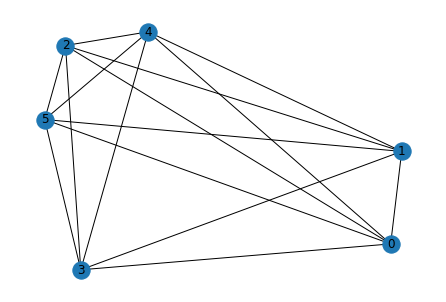

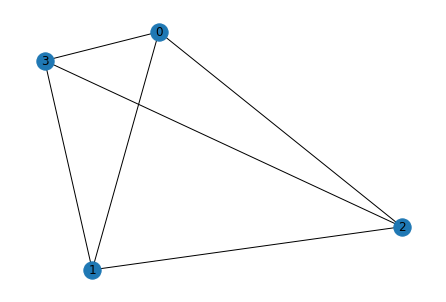

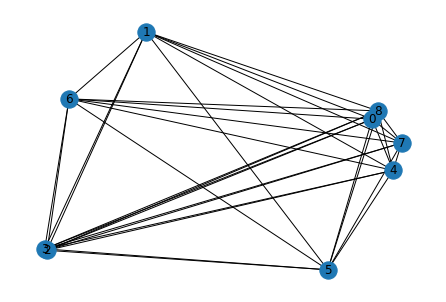

In [14]:
# Plotting the inputs as graphs

for r in res:
    carpet_list = np.array(r['carpet_list'])
    G = nx.Graph()

    edges, weights = np.split(carpet_list, [-1], axis=1)

    G = nx.from_edgelist(list(map(tuple, edges)), G)
    for i, edge in enumerate(edges):
        G[edge[0]][edge[1]]['weight'] = -weights[i,0]
    
    nx.draw(G, with_labels=True)
    plt.show()